<a href="https://colab.research.google.com/github/missetubal/infnet_projeto_text_mining/blob/main/question_rio_projeto_de_disciplina_de_text_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

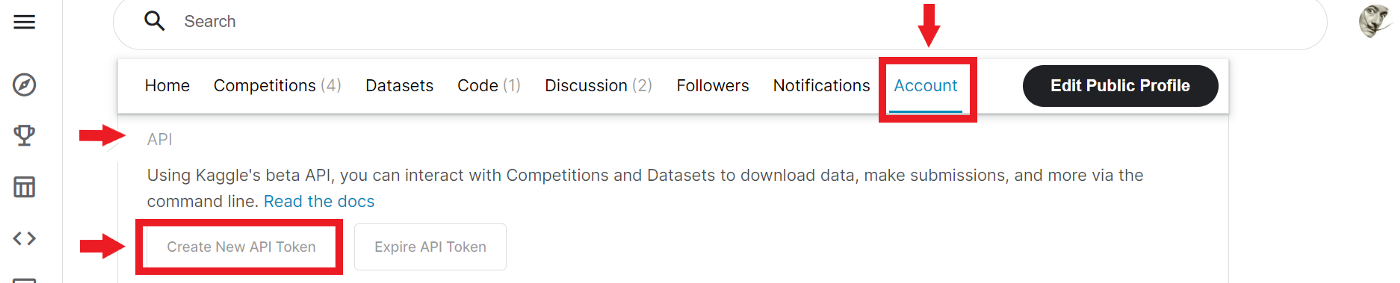

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json

In [ ]:
!pip install -q kaggle
!rm -rf kaggle.json
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michelleosetubal","key":"a7ba89182edc84d07de532535432dbdd"}'}

Crie a pasta .kaggle

In [ ]:
!rm -rf .kaggle
!mkdir .kaggle
!cp kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json

Baixe o dataset

In [ ]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0
100% 187M/187M [00:04<00:00, 37.9MB/s]
100% 187M/187M [00:04<00:00, 40.4MB/s]


## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [ ]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [ ]:
# Escreva seu código aqui
!pip install spacy --upgrade
!python -m spacy download pt_core_news_lg
# ...

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB ? eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [ ]:
import nltk

# Escreva seu código aqui
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from tqdm.auto import tqdm
tqdm.pandas()


#pyLDAvis v 3.4.0 não possui mais o arquivo sklearn.pyno pacote pip.
!pip install git+https://github.com/bmabey/pyLDAvis.git &> /dev/null

import pyLDAvis
import pyLDAvis.lda_model


from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

from typing import List, Set, Any


SEED = 123

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [ ]:
df['date'] = pd.to_datetime(df.date)
df
# Create a dataframe named news_2016
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'] == 'mercado')]

news_2016.shape

(7943, 6)

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem).
Para tal, complete o conteúdo da função `tokenize`.

In [ ]:
from nltk.stem import RSLPStemmer
from nltk.tokenize import word_tokenize

stop_words = nltk.corpus.stopwords.words('portuguese')

def tokenize(text: str) -> List:
  """
  Function for tokenizing using `nltk.tokenize.word_tokenize`

  Returns:
    - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
    IMPORTANT: Only tokens with alphabetic
               characters will be returned.
  """
  #escreva seu código aqui
  stemmer = RSLPStemmer()
  tokenized_text = []
  tokens = word_tokenize(text.lower(), language='portuguese')
  for token in tokens:
    if(token.isalpha()):
      tokens_stem = stemmer.stem(token)
      tokenized_text.append(tokens_stem)
  return tokenized_text

news_2016.loc[:, 'nltk_tokens'] = news_2016['text'].progress_map(tokenize)

  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016.nltk_tokens

34207    [sou, apen, a, mulh, de, um, fazend, diz, chri...
34238    [a, cont, do, celul, ou, control, fic, mais, c...
34245    [a, mai, part, do, projet, de, ajust, da, cont...
34248    [desd, as, prim, déc, do, sécul, se, diz, que,...
34249    [o, cifr, letr, selec, seman, lanç, na, áre, d...
                               ...                        
94280    [par, o, econom, rodolf, margat, do, banc, san...
94295    [conveni, saúd, boa, form, e, praz, as, tend, ...
94301    [com, o, rend, em, qued, mais, pesso, são, for...
94310    [o, brasil, pod, perd, até, milhã, de, vag, co...
94314    [enquant, brig, com, a, falt, de, dinh, em, ca...
Name: nltk_tokens, Length: 7943, dtype: object

## Criar uma documento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [ ]:
# Escreva seu código aqui

nlp = spacy.load('pt_core_news_lg')
news_2016.loc[:, 'spacy_doc'] = news_2016.text.progress_map(nlp)


  0%|          | 0/7943 [00:00<?, ?it/s]

## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [ ]:
from nltk import text
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS) +  ["o", "em", "em o", "em a", "ano"])

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    return w.isalpha() and not(w in complete_stopwords)

def lemma(doc: spacy.lang.pt.Portuguese) -> List[str]:
    """
    Apply spacy lemmatization on the tokens of a text

    Returns:
       - a list representing the standardized (with lemmatisation) vocabulary
    """
    words = []
    for token in doc:
      if filter(token.lemma_):
        words.append(token.lemma_)
    return ' '.join(words)


news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)


  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016.spacy_lemma

34207    mulher fazendeiro Christine Conder modéstia mo...
34238    conta celular controle ficar cara decisão STF ...
34245    projeto ajuste conta público aprovar mau situa...
34248    década século nota ópera sinfonia brotar pensa...
34249    Cifras Letras selecionar semanalmente lançamen...
                               ...                        
94280    economista Rodolfo Margato banco Santander eco...
94295    conveniência saúde prazer tendência consumo ma...
94301    rendimento queda pessoa forçar buscar fila emp...
94310    Brasil perder milhão vaga carteira assinar com...
94314    briga dinheiro caixa empreiteira responsável o...
Name: spacy_lemma, Length: 7943, dtype: object

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [ ]:
def NER(doc: spacy.lang.pt.Portuguese):
  """
  Return the list of organizations for a SPACY document
  """
  # Escreva seu código aqui
  orgs = []
  for ent in doc.ents:
    if ent.label_ == "ORG":
      orgs.append(ent.text)
  orgs = list(set(orgs))
  return orgs

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

news_2016.spacy_ner

  0%|          | 0/7943 [00:00<?, ?it/s]

34207    [Ordem do Império Britânico, Cavamos, Departam...
34238    [Vivo, FERNANDA BRIGATTI, Claro, TIM, Oi, GERC...
34245    [Assembleia, Assembleias locais, Executivo, EM...
34248    [PÁGS, MIT, Apple, Instituto de Tecnologia de ...
34249    [Presidente da Singularity University, Coach, ...
                               ...                        
94280                                          [FGV, Ibre]
94295    [Euromonitor Internacional, Nielsen, Diageo, E...
94301                         [MAIOR NA BASE, LCA, Jovens]
94310    [LCA Consultores, PME, Pnad, GO Associados, Pn...
94314    [Lava Jato, SUCATA, Engevix, Eletronuclear Oth...
Name: spacy_ner, Length: 7943, dtype: object

## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF.
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos.

In [ ]:
class Vectorizer:
  def __init__(self, doc_tokens: List):
    self.doc_tokens = doc_tokens
    self.tfidf = None

  def vectorizer(self):
      """
      Convert a list of tokens to tfidf vector
      Returns the tfidf vector and attribute it to self.tfidf
      """
      tfidf_ = TfidfVectorizer(stop_words=None, min_df=10, max_features=5000)

      tfidf_.fit(self.doc_tokens)
      self.tfidf = tfidf_

      return

  def __call__(self):
    if self.tfidf is None:
        self.vectorizer()
    return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)

def tokens2tfidf(tokens):
  array =  vectorizer().transform([tokens]).toarray()[0]
  return array

news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)


  0%|          | 0/7943 [00:00<?, ?it/s]

In [ ]:
news_2016.tfidf

34207    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34238    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34245    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34248    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
34249    [0.0, 0.03883755154242663, 0.0, 0.0, 0.0, 0.0,...
                               ...                        
94280    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94295    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94301    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94310    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
94314    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: tfidf, Length: 7943, dtype: object

## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [ ]:
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())
lda = LDA(n_components=N_TOKENS, max_iter=100,random_state=SEED).fit(corpus)

In [ ]:
def get_model_topics(model, vectorizer, n_top_words=10):
    for topic, word_vector in enumerate(model.components_):
      total = word_vector.sum()
      largest = word_vector.argsort()[::-1]
      print("\nTopic %02d" % topic)

      for i in range(0, n_top_words):
        print("  %s (%2.2f)" % (vectorizer[largest[i]],
                  word_vector[largest[i]]*100.0/total))

get_model_topics(lda, vectorizer.tfidf.get_feature_names_out())


Topic 00
  empresa (0.61)
  milhão (0.31)
  brasil (0.29)
  negócio (0.27)
  pessoa (0.27)
  serviço (0.26)
  companhia (0.26)
  mercado (0.26)
  outro (0.25)
  país (0.25)

Topic 01
  aéreo (2.85)
  voo (2.52)
  embraer (1.82)
  aeronave (1.77)
  aviação (1.76)
  avião (1.70)
  passageiro (1.63)
  gol (1.38)
  aeroporto (1.36)
  latam (0.94)

Topic 02
  samsung (2.63)
  note (1.86)
  galaxy (1.39)
  fup (1.02)
  bateria (0.91)
  recall (0.74)
  aparelho (0.71)
  fogo (0.43)
  incidente (0.23)
  coreia (0.19)

Topic 03
  grécia (1.67)
  grego (1.08)
  atenas (0.74)
  aes (0.58)
  lego (0.49)
  resgate (0.40)
  euro (0.24)
  tática (0.16)
  europeia (0.05)
  advertir (0.03)

Topic 04
  energia (1.61)
  oi (1.23)
  petrobras (1.17)
  empresa (1.05)
  companhia (1.01)
  usina (0.92)
  operação (0.88)
  distribuidora (0.85)
  eletrobras (0.84)
  judicial (0.79)

Topic 05
  índice (1.50)
  dólar (1.47)
  bolsa (1.13)
  on (1.03)
  alta (0.99)
  mercado (0.94)
  ação (0.84)
  moeda (0.83)
 

### Visualize os tópicos usando a ferramenta pyLDAVis

In [ ]:
# Escreva seu código aqui
corpus_matrix = np.matrix(corpus)
pyLDAvis.lda_model.prepare(lda, dtm=corpus_matrix, vectorizer = vectorizer.tfidf)


AssertionError: Term frequencies and vocabulary are of different sizes, 1 != 5000.

### Atribua a cada text, um (e apenas um) tópic.

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [ ]:
def get_topic(tfidf: np.array):
    """
    Get topic for a lda trained model
    """
    # tfidf_array = np.matrix(tfidf)
    topics = lda.transform([tfidf])
    return np.argmax(topics)+1

news_2016['topic'] = news_2016.tfidf.progress_map(get_topic)
news_2016.topic.value_counts()


  0%|          | 0/7943 [00:00<?, ?it/s]

topic
9    3123
1    2732
7    1360
6     572
5     142
8       7
2       7
Name: count, dtype: int64

## Número de documentos vs tópicos

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

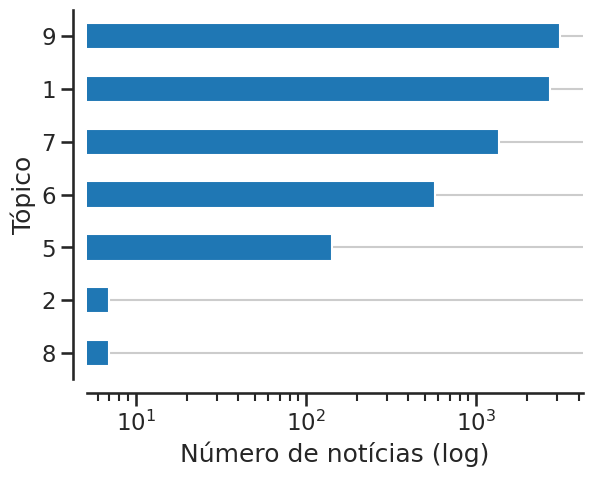

In [ ]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

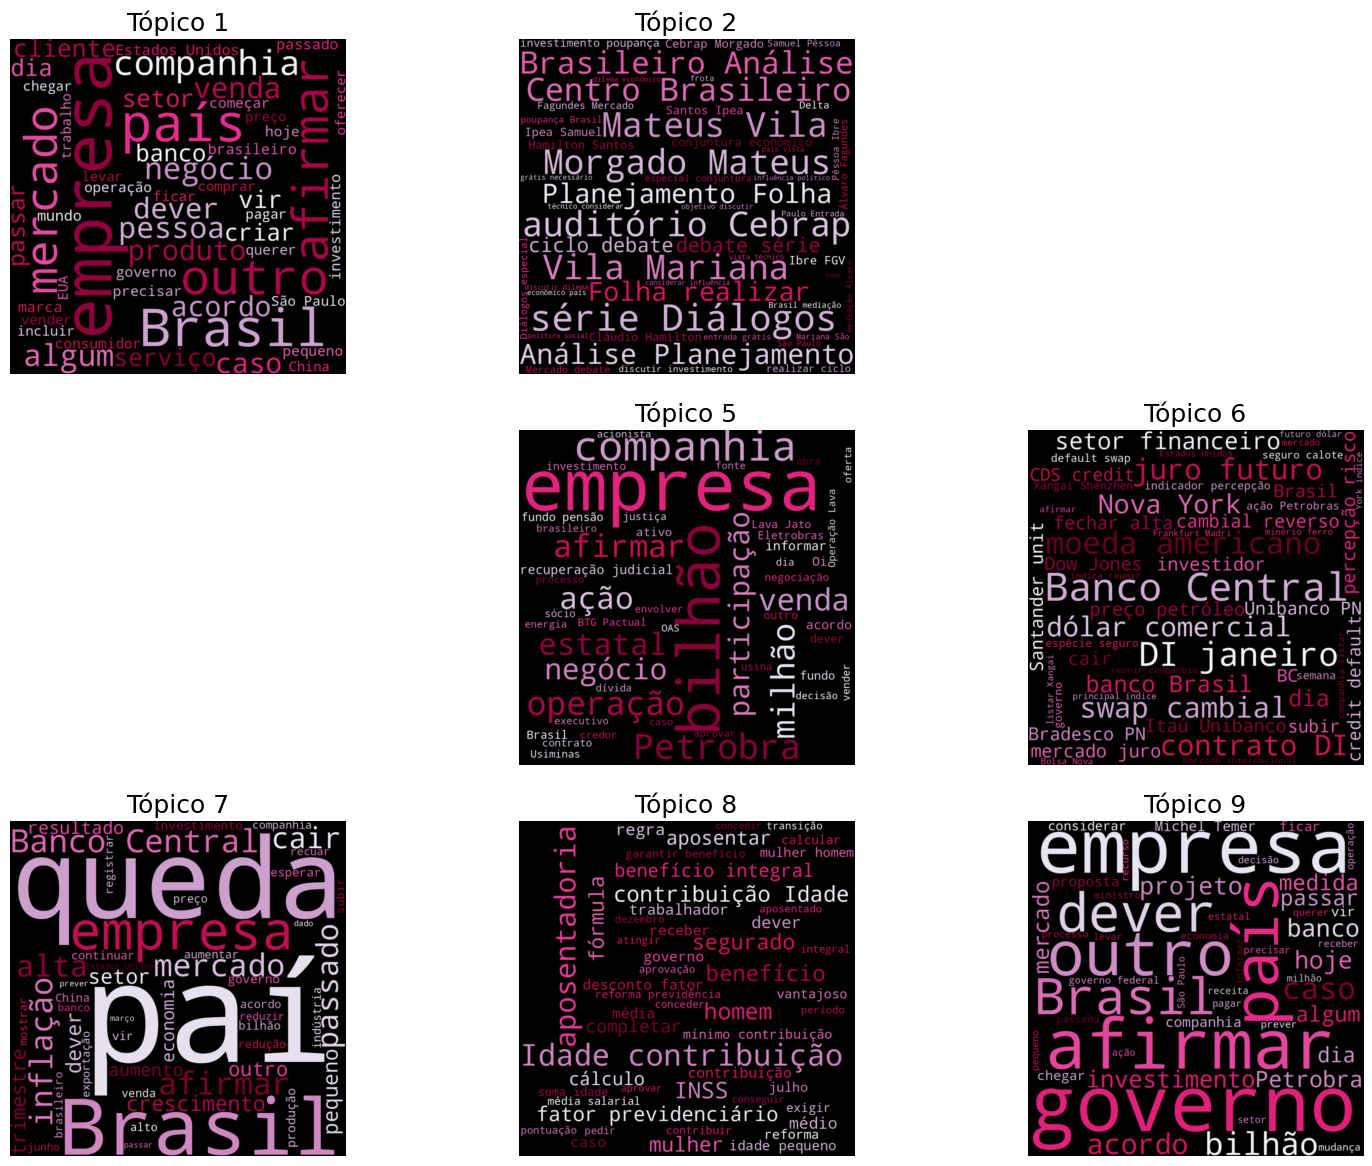

In [ ]:
def plot_wordcloud(text:str, ax:plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text/
    Arguments:
        -  text: string to be analised
        -  ax: plt subaxis
    Returns:
     - ax
    """
    # Escreva seu código aqui
    wc = WordCloud(background_color="black",
                   colormap="PuRd",
                   max_words=50,
                   width=1000,
                   height=1000).generate(text)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis("off")
    return ax

def plot_wordcloud_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = chain(*topic_news.spacy_lemma.values.tolist())
    string_complete = ''.join(list_of_words)
    if not string_complete:
        ax.text(0.5, 0.5, 'Não há palavras suficientes', horizontalalignment='center', verticalalignment='center')
        ax.axis('off')
    else:
      return plot_wordcloud(string_complete, ax)
fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()

## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa.

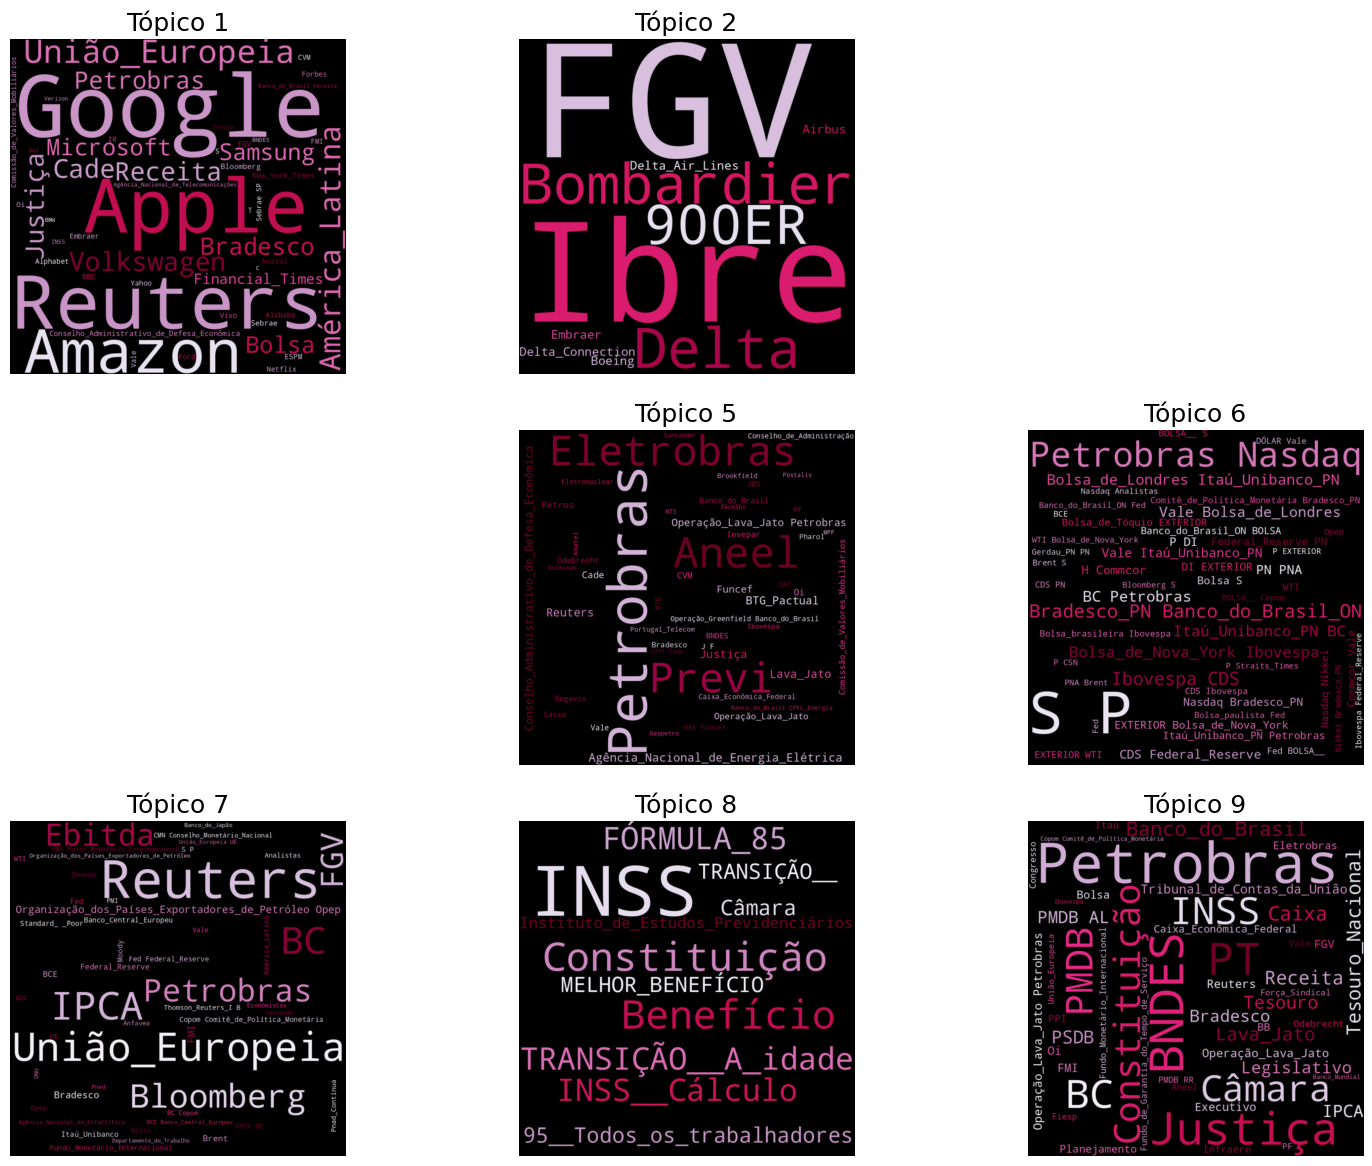

In [ ]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()